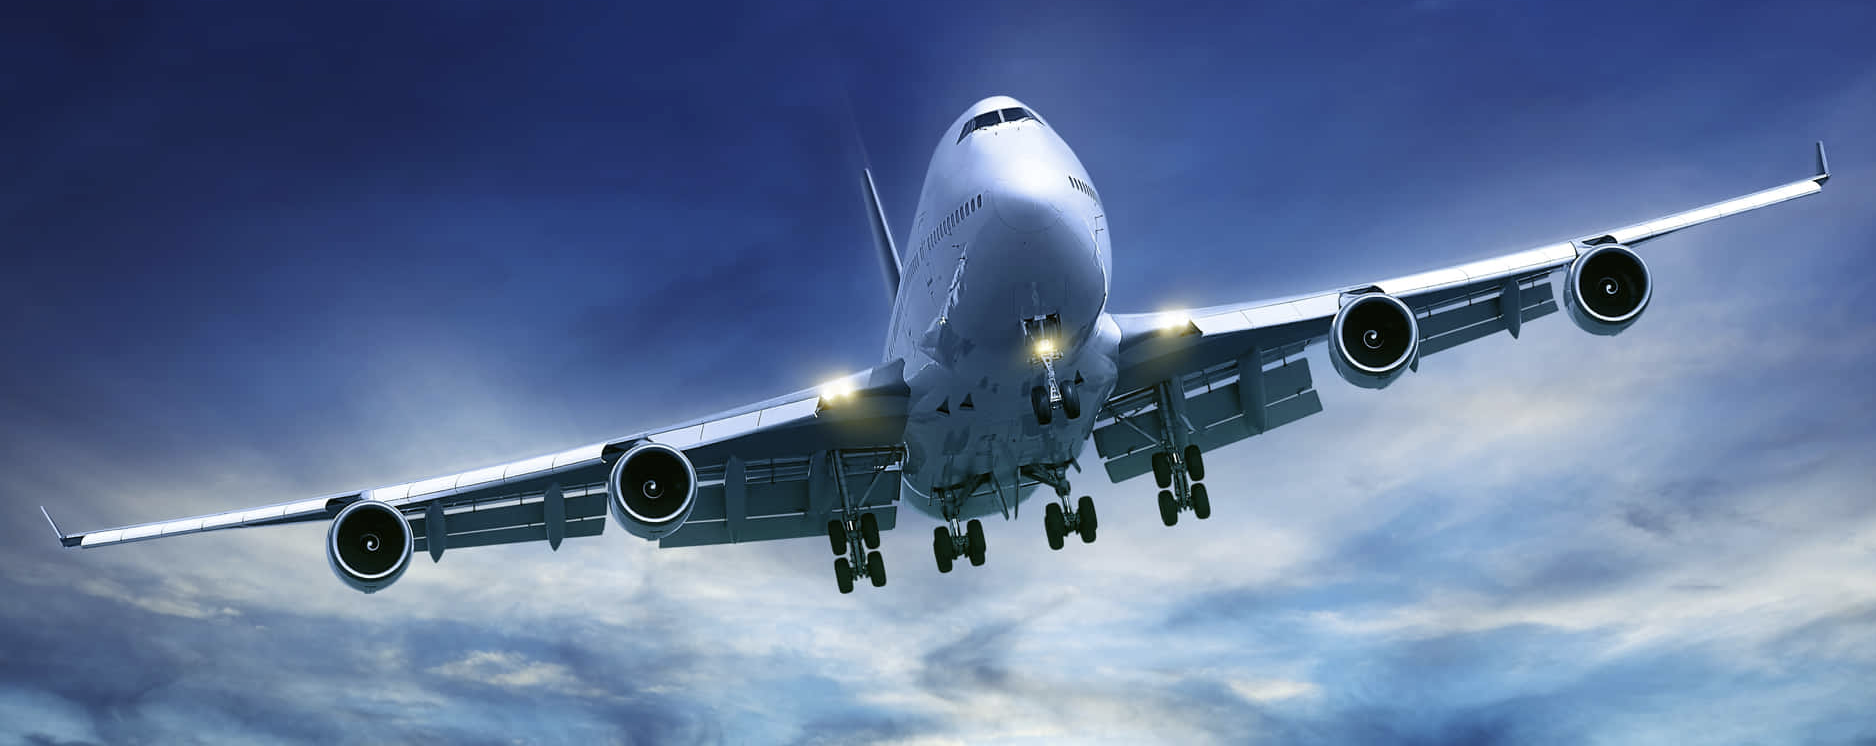

# ✈️ Airline Price Analysis

## 📝 Project Description

This project focuses on analyzing and cleaning a flight price dataset to uncover trends and insights in airline ticket pricing. The analysis was performed using Python, primarily with the `pandas` and `numpy` libraries.

---

## 📂 Steps Performed

### 1. Cloning Dataset
- Cloned a dataset from a GitHub repository containing flight pricing data.

### 2. Importing Libraries
- Imported the necessary Python libraries for data manipulation and numerical operations.

### 3. Overall Data Analysis
- Loaded the dataset from an Excel file into a pandas DataFrame.
- Displayed the initial and final rows of the dataset to get a quick overview.
- Examined the dataset's structure, data types, and non-null values.
- Identified and counted null values across all columns.
- Dropped rows where the **Total_Stops** column had missing values.
- Addressed and managed missing values specifically within the **Route** column.

### 4. Filtering
- Filtered flights based on specific conditions, such as isolating flights operated by 'IndiGo' and identifying flights with 'non-stop' total stops.
- Created various subsets of the data by combining filtering conditions, including specific route combinations, different numbers of total stops, and particular airlines.

---

## 🧹 Column-Wise Cleaning

### Columns Cleaned:
- `Airline`, `Date_of_Journey`, `Dep_Time`, `Route`, `Arrival_Time`, `Destination`, `Total_Stops`, `Additional_Info`, `Duration`

### Cleaning Steps:
- Extracted the **day** and **month** components from the **Date_of_Journey** column, creating new dedicated columns for each.
- Extracted **hours** and **minutes** from both **Dep_Time** and **Arrival_Time** columns, converting them into numerical formats.
- Dropped the original date and time columns after extracting their components.
- Identified and replaced '5m' entries in the **Duration** column with missing values, then removed those rows from the dataset.
- Split the **Duration** column to separately extract **hours** and **minutes** into new columns.
- Handled any missing minute values by filling them with 0 and then converted both hours and minutes to integer types.
- Calculated the **Total_Duration_Minutes** by converting hours to minutes and adding them to the existing minutes.
- Dropped the original **Duration** column and any temporary columns created during this process.

---

## 📊 Analysis Performed

- **Average Ticket Price**:
  - Analyzed the average ticket price categorized by **Airline**.
  - Determined the average ticket price based on **Route** (Source ➡ Destination).
  - Calculated the average ticket price considering the **Total_Stops**.

- **Flight Volume Analysis**:
  - Computed the total number of flights for each **Airline**.
  - Identified the total number of flights originating from each **Source** airport.

- **Time-Based Trends**:
  - Explored monthly trends in flight prices.
  - Calculated the average departure hours for each airline.

- **Visualizations** created using Python's `matplotlib.pyplot` and `seaborn` libraries to represent the findings graphically.

---

## 💾 Final Output

- Saved the thoroughly cleaned DataFrame to a CSV file, ensuring it's ready for further visualization, comprehensive reporting, or advanced predictive modeling.

---

## 🛠️ Technologies Used

- **Python**
- **Pandas**
- **NumPy**
- **Excel**
- **Matplotlib / Seaborn** (for data visualization)

---

## ✅ Project Status

- [x] Dataset Imported
- [x] Data Cleaning Completed
- [x] Feature Extraction Done
- [x] Exploratory Data Analysis Completed
- [x] Cleaned Dataset Saved as CSV

# Cloning Dataset

In [1]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

Cloning into 'Datasets'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 287 (delta 10), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (287/287), 301.25 MiB | 29.81 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Updating files: 100% (231/231), done.


# Importing Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

# 1) Overall Data Analysis

#### 1.1) Data Importation

In [4]:
df=pd.read_excel("/content/Datasets/Flight Prices/flight_price.xlsx")

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
'''
KPI's

1) Average Ticket Price by Airline
2) Average Ticket Price by Route (Source → Destination)
3) Average Price by Number of Stops
4) Flight Volume by Airline
5) Flight Volume by Source Airport
6) Monthly Price Trend
7) Average Departure Hour by Airline
'''

"\nKPI's\n\n1) Average Ticket Price by Airline\n2) Average Ticket Price by Route (Source → Destination)\n3) Average Price by Number of Stops\n4) Flight Volume by Airline\n5) Flight Volume by Source Airport\n6) Monthly Price Trend\n7) Average Departure Hour by Airline\n"

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [9]:
df.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### 1.2) Checking basics values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### 1.3) Checking the null values

In [12]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


### 1.4) Removing Null Values

In [13]:
df.dropna(subset = ['Total_Stops'], inplace = True)
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# Filteration


## Filter out values where no of stops ==" non-stop"

In [14]:
df[df['Airline']=='IndiGo']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10631,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No info,6037
10641,IndiGo,6/03/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,7295
10649,IndiGo,1/03/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 02 Mar,2h 40m,non-stop,No info,4778
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823


### Filter out the values where flight name is Indigo and the number of stop is 1

In [15]:
df[(df['Airline']=='IndiGo') & (df["Total_Stops"]== "1 stop")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
26,IndiGo,1/06/2019,Delhi,Cochin,DEL → LKO → COK,21:50,03:35 02 Jun,5h 45m,1 stop,No info,8238
35,IndiGo,27/06/2019,Delhi,Cochin,DEL → BOM → COK,10:35,21:00,10h 25m,1 stop,No info,5894
63,IndiGo,15/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 16 May,10h 30m,1 stop,No info,7191
...,...,...,...,...,...,...,...,...,...,...,...
10600,IndiGo,3/06/2019,Delhi,Cochin,DEL → HYD → COK,14:20,22:30,8h 10m,1 stop,No info,6938
10603,IndiGo,9/06/2019,Delhi,Cochin,DEL → MAA → COK,02:00,07:25,5h 25m,1 stop,No info,5636
10607,IndiGo,21/03/2019,Delhi,Cochin,DEL → BOM → COK,09:10,01:35 22 Mar,16h 25m,1 stop,No info,8765
10619,IndiGo,27/04/2019,Delhi,Cochin,DEL → LKO → COK,21:50,03:35 28 Apr,5h 45m,1 stop,No info,6307


### Q) Find me the average of Indigo Airline which have source as Kolkata and no of stops = '1 stop'

In [16]:
df[(df['Airline']=='IndiGo') &(df['Source']=='Kolkata')& (df["Total_Stops"]== "1 stop")]['Price'].mean()

np.float64(5730.225806451613)

### Q) Find me the average of SpiceJet Airline which have source as Kolkata and no of stops = 'Non-stop'

In [17]:
df[(df['Airline']=='SpiceJet') & (df["Total_Stops"]== "non-stop")]['Price'].mean()

np.float64(3805.423880597015)

### Q) Find me the flight whose price is greater than 3000 and the Source is banglore. Now tell count of jet Airways in it.


In [18]:
df[(df['Price'] >3000) & (df['Source']== 'Banglore') & (df['Airline']=='Jet Airways')]['Airline'].value_counts()

,count
Airline,
Jet Airways,788


In [19]:
df[df["Total_Stops"]== "non-stop"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229


# 2) Column Wise Cleaning

## 2.1 Checking and Cleaning the Airline Column

In [20]:
df['Airline'].info()

<class 'pandas.core.series.Series'>
Index: 10682 entries, 0 to 10682
Series name: Airline
Non-Null Count  Dtype 
--------------  ----- 
10682 non-null  object
dtypes: object(1)
memory usage: 166.9+ KB


In [21]:
df['Airline'].nunique()

12

In [22]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [23]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [24]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [25]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## 2.2  Cleaning the  column Date_of_journey




In [26]:
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [27]:
day= []
month=[]
year=[]
for i in df['Date_of_Journey']:
  day.append(i.split("/")[0])
  month.append(i.split("/")[1])
  year.append(i.split("/")[2])

In [28]:
df['Day']= day
df['Month']= month
df['Year']= year

In [29]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [30]:

del df['Day']
del df['Year']
del df['Month']

##### Splitting the string on the basics of / and storing as a day month and year by typecasting as a int

In [31]:
df['day'] = df['Date_of_Journey'].str.split('/').str[0].astype('int')
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype('int')
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype('int')

##### Deleting the column Date_of_journey

In [32]:
del df['Date_of_Journey']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  day              10682 non-null  int64 
 11  Month            10682 non-null  int64 
 12  Year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.4+ MB


## 2.3 Checking the source column for cleaning

##### Number of distinct Source

In [34]:
df['Source'].nunique()

5

##### Distinct Source

In [35]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [36]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


## 2.4 Cleaning the Dep_Time Column

#### Splitting The Hour And Min And Creating New Columns

In [37]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0].astype('int')
df['Dep_min']=df['Dep_Time'].str.split(':').str[1].astype('int')

In [38]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


#### Deleting The Dep_Time Column

In [39]:
del df['Dep_Time']

In [40]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


## 2.5 Cleaning the Route Column

#### As per now there is no any use of route column so we will remove it

In [41]:
del df['Route']

In [42]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


## 2.6 Cleaning the Arrival time Column

In [43]:
df['Arr_hour']=df['Arr_h']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arr_min']=df['Arr_h']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]


#### Checking for different value count for Arr_hour

In [44]:
df['Arr_hour'].value_counts()

,count
Arr_hour,
19,1626
12,897
04,838
21,703
22,647
01,529
18,514
09,489
23,485


#### Checking for different value count for Arr_min

In [45]:
df['Arr_min'].value_counts()

,count
Arr_min,
00,1447
25,1301
15,1286
35,1111
20,902
30,832
50,750
45,697
05,660


In [46]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,04,25,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,25
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,20
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,10


#### Deleting the previous Arrival_time Column

In [47]:
del df['Arrival_Time']

In [48]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,04,25,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,10


## 2.7 Cleaning Destination Column

#### Checking for different value count using value_count()

In [49]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


#### Number of distinct Destination

In [50]:
df['Destination'].nunique()

6

#### Distinct Destination

In [51]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [52]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,04,25,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,10


## 2.8 Cleaning Duration Column

#### Splitting the duration column by ' ' and h







In [53]:
df['Duration_Hrs']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [54]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min,Duration_Hrs
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,01,10,10,2
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,15,7
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,04,25,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,30,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,25,2
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,20,2
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,20,3
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,10,2


#### Checking the count of different value

##### In this we are getting a value '5m' so we have to remove it such that we can convert the column to int data type


In [55]:
df['Duration_Hrs'].value_counts()

,count
Duration_Hrs,
2,2402
1,621
3,501
7,487
5,481
9,445
12,428
8,424
13,407


#### Replacing '5m' by Nan using numpy np.nan()









In [56]:
## In this methord we have retrived the row that is not equal to 5m and created a new  row df_ for it
'''
df_ = df[df['Duration']!= '5m']
df_.value_counts()
'''

"\ndf_ = df[df['Duration']!= '5m']\ndf_.value_counts()\n"

In [57]:
# In this methord we have used drop() function to remove the 5m and saving it in the df by inplace

'''
df.drop(df[df['Duration']== '5m'].index , inplace=True)
'''

"\ndf.drop(df[df['Duration']== '5m'].index , inplace=True)\n"

In [58]:
df['Duration_Hrs'] = df['Duration_Hrs'].replace('5m', np.nan)

#### After the replacement '5m' has been replaced via Nan as in value_count() '5m' is not there

In [59]:
df['Duration_Hrs'].value_counts()

,count
Duration_Hrs,
2,2402
1,621
3,501
7,487
5,481
9,445
12,428
8,424
13,407


In [60]:
df['Duration_Hrs'].info()

<class 'pandas.core.series.Series'>
Index: 10682 entries, 0 to 10682
Series name: Duration_Hrs
Non-Null Count  Dtype 
--------------  ----- 
10681 non-null  object
dtypes: object(1)
memory usage: 424.9+ KB


#### Dropping NaN value which we have replaced

In [61]:
df.dropna(subset=['Duration_Hrs'], inplace=True)

In [62]:
df['Duration_Hrs'].info()

<class 'pandas.core.series.Series'>
Index: 10681 entries, 0 to 10682
Series name: Duration_Hrs
Non-Null Count  Dtype 
--------------  ----- 
10681 non-null  object
dtypes: object(1)
memory usage: 166.9+ KB


#### Getting minutes from Duration column

In [63]:
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split("m").str[0]

#### Checking the null value in Duration_min

In [64]:
df['Duration_min'].info()

<class 'pandas.core.series.Series'>
Index: 10681 entries, 0 to 10682
Series name: Duration_min
Non-Null Count  Dtype 
--------------  ----- 
9650 non-null   object
dtypes: object(1)
memory usage: 166.9+ KB


#### In Duration_min column we are getting some null values. Lets fill the null value with 0.

In [65]:
df.fillna(0, inplace=True)

#### Null value is filled with 0

In [66]:
df['Duration_min'].info()

<class 'pandas.core.series.Series'>
Index: 10681 entries, 0 to 10682
Series name: Duration_min
Non-Null Count  Dtype 
--------------  ----- 
10681 non-null  object
dtypes: object(1)
memory usage: 166.9+ KB


#### converting the Hour into minutes and adding minutes to it.

In [67]:
df['Duration_(in mins)']=df['Duration_Hrs'].astype('int')*60 + df['Duration_min'].astype('int')

#### Removing the  Duration,Duration_Hrs,	Duration_min Columns


In [68]:
del df['Duration']
del df['Duration_Hrs']
del df['Duration_min']

In [69]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min,Duration_(in mins)
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,04,25,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,55,22,25,25,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,45,23,20,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,20,11,20,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,30,14,10,10,160


## 2.9 Checking and Cleaning Destination Column


In [70]:
df['Destination'].info()

<class 'pandas.core.series.Series'>
Index: 10681 entries, 0 to 10682
Series name: Destination
Non-Null Count  Dtype 
--------------  ----- 
10681 non-null  object
dtypes: object(1)
memory usage: 166.9+ KB


In [71]:
df['Destination'].nunique()

6

In [72]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [73]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,696
Kolkata,381


## 2.10 Checking and Cleaning Total_Stops  Column


In [74]:
df['Total_Stops'].info()

<class 'pandas.core.series.Series'>
Index: 10681 entries, 0 to 10682
Series name: Total_Stops
Non-Null Count  Dtype 
--------------  ----- 
10681 non-null  object
dtypes: object(1)
memory usage: 166.9+ KB


In [75]:
df['Total_Stops'].nunique()

5

In [76]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [77]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1519
3 stops,45
4 stops,1


In [78]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min,Duration_(in mins)
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,04,25,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,55,22,25,25,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,45,23,20,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,20,11,20,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,30,14,10,10,160


## 2.11 Checking  and Cleaning Additional_info column


In [79]:
df['Additional_Info'].info()

<class 'pandas.core.series.Series'>
Index: 10681 entries, 0 to 10682
Series name: Additional_Info
Non-Null Count  Dtype 
--------------  ----- 
10681 non-null  object
dtypes: object(1)
memory usage: 166.9+ KB


In [80]:
df['Additional_Info'].nunique()

10

In [81]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [82]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8343
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [83]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_h,Arr_min,Duration_(in mins)
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,01,10,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,04,25,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,19,55,22,25,25,150
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,20,45,23,20,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,8,20,11,20,20,180
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,11,30,14,10,10,160


# 3. Analysis

In [84]:
'''
KPI's

1) Average Ticket Price by Airline
2) Average Ticket Price by Route (Source → Destination)
3) Average Price by Number of Stops
4) Flight Volume by Airline
5) Flight Volume by Source Airport
6) Monthly Price Trend
7) Average Departure Hour by Airline
'''

"\nKPI's\n\n1) Average Ticket Price by Airline\n2) Average Ticket Price by Route (Source → Destination)\n3) Average Price by Number of Stops\n4) Flight Volume by Airline\n5) Flight Volume by Source Airport\n6) Monthly Price Trend\n7) Average Departure Hour by Airline\n"

## 3.1 Average Ticket Price by Airline

In [85]:
df.groupby('Airline')['Price'].mean()

,Price
Airline,
Air Asia,5590.260188
Air India,9608.019429
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


<Axes: title={'center': 'Average Ticket Price by Airline'}, xlabel='Airline'>

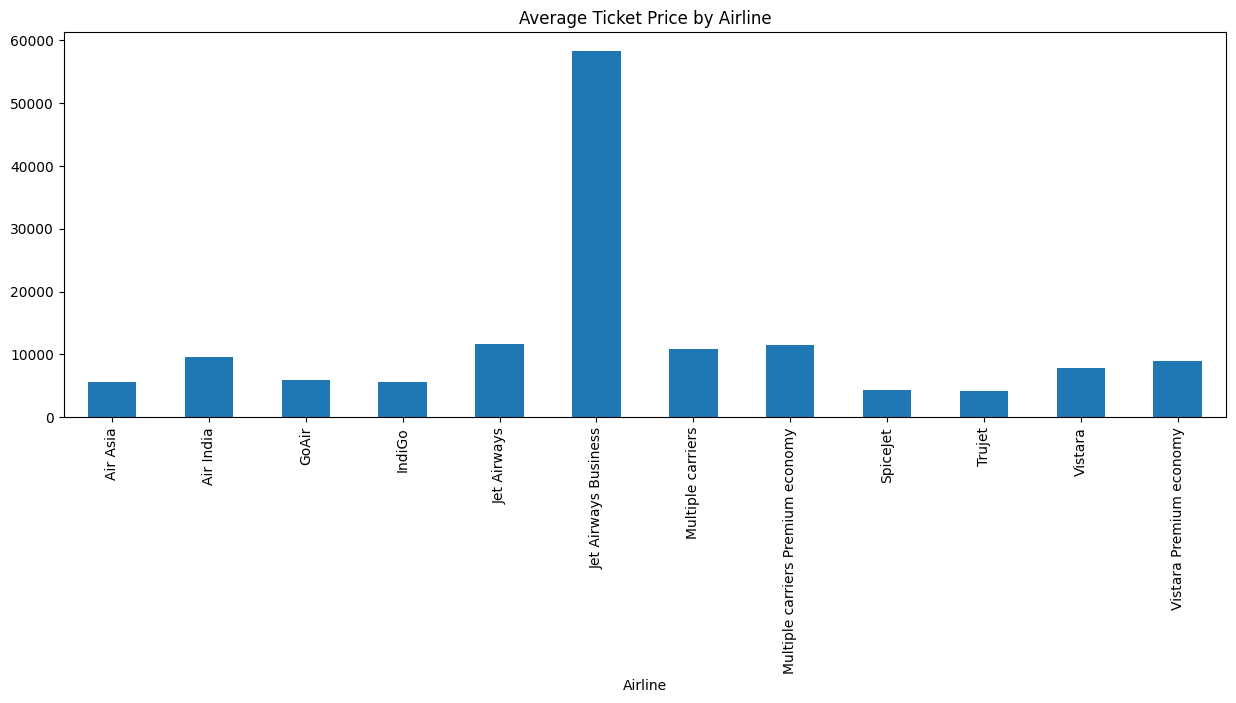

In [86]:
df.groupby('Airline')['Price'].mean().plot(kind='bar', title='Average Ticket Price by Airline', figsize=(15, 5))

## 3.2 Average Ticket Price by Route (Source → Destination)

<Axes: title={'center': 'Average Ticket Price by Route (Source → Destination)'}, xlabel='Source,Destination'>

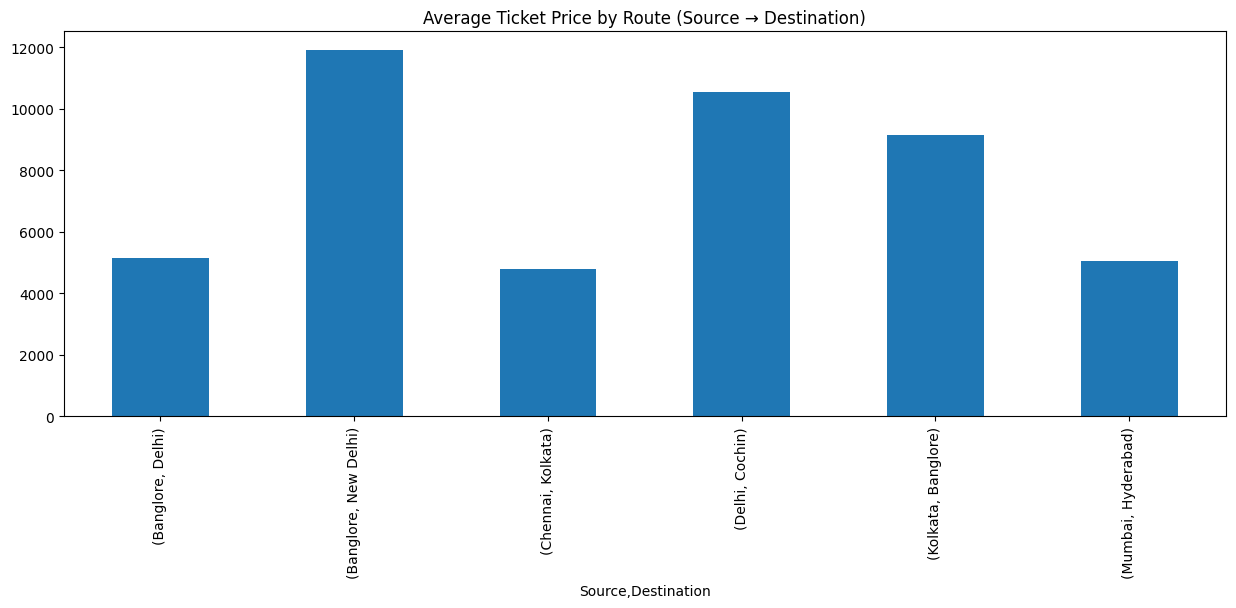

In [87]:
df.groupby(['Source','Destination'])['Price'].mean().plot(kind="bar", title='Average Ticket Price by Route (Source → Destination)', figsize=(15, 5))

## 3.3 Average Price by Number of Stops

In [88]:
df.groupby('Total_Stops')['Price'].mean()

,Price
Total_Stops,
1 stop,10594.123556
2 stops,12712.772219
3 stops,13112.000000
4 stops,17686.000000
non-stop,5024.900315


<Axes: title={'center': 'Average Price by Number of Stops'}, xlabel='Total_Stops'>

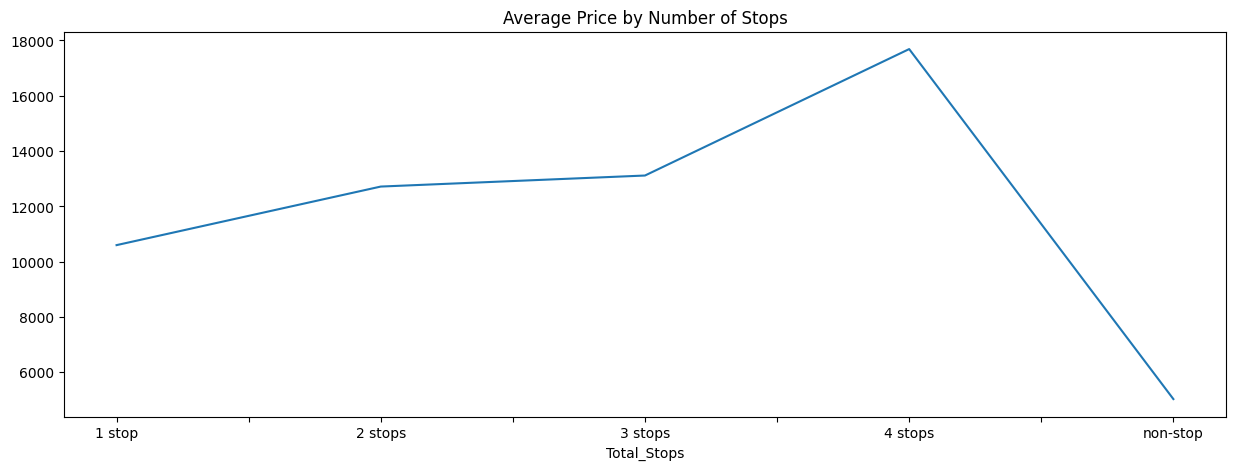

In [89]:
df.groupby('Total_Stops')['Price'].mean().plot(kind='line', title='Average Price by Number of Stops', figsize=(15, 5))

## 3.4 Flight Volume by Airline

In [90]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1750
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


<Axes: xlabel='Airline'>

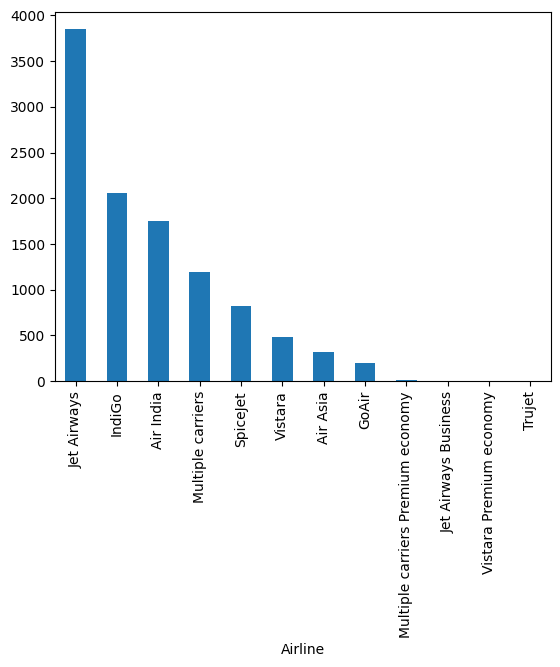

In [91]:
df['Airline'].value_counts().plot(kind='bar')

## 3.5 Flight Volume by Source Airport

In [92]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,696
Chennai,381


<Axes: title={'center': 'Flight Volume by Source Airport'}, xlabel='Source'>

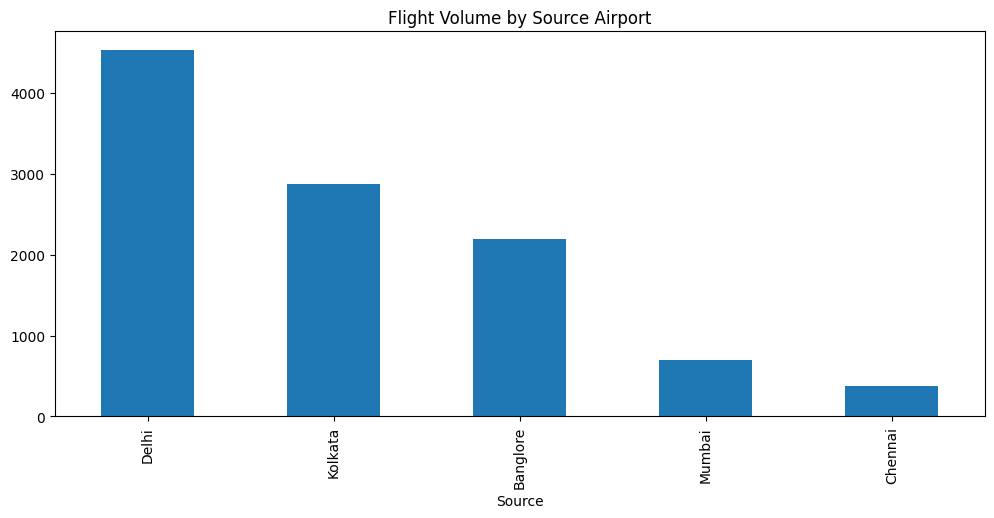

In [93]:
df['Source'].value_counts().plot(kind='bar', title='Flight Volume by Source Airport', figsize=(12, 5))

## 3.6 Monthly Price Trend

In [94]:
df.groupby('Month')['Price'].mean()

,Price
Month,
3,10670.762027
4,5770.847081
5,9127.722944
6,8828.796134


<Axes: title={'center': 'Monthly Price Trend'}, xlabel='Month'>

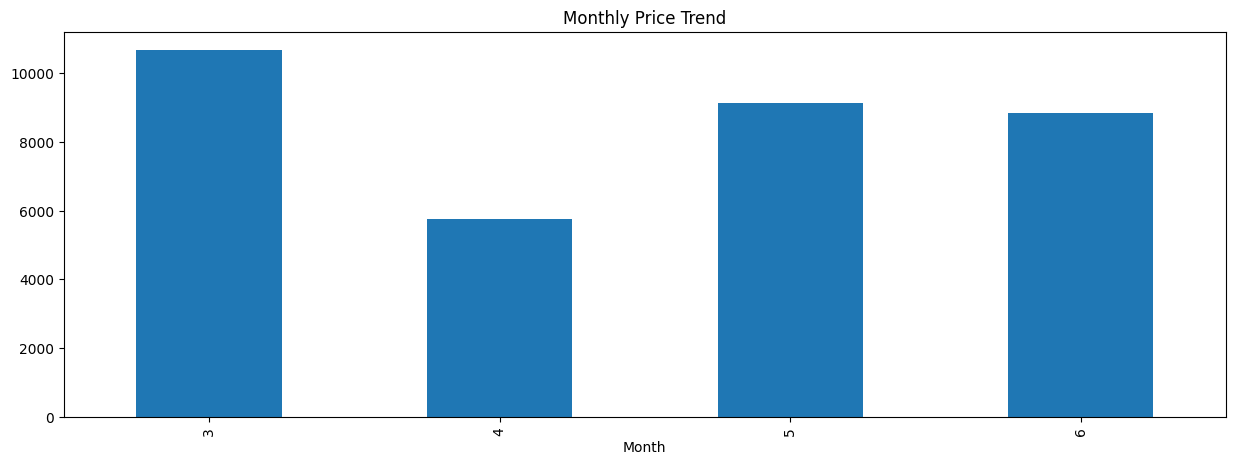

In [95]:
df.groupby('Month')['Price'].mean().plot(kind='bar', title='Monthly Price Trend', figsize=(15, 5))

In [96]:
x=df.groupby(['Airline','Month'])['Price'].mean()
x


Airline                            Month
Air Asia                           3         5988.016667
                                   4         4729.362069
                                   5         5174.346154
                                   6         6304.917526
Air India                          3        10687.219282
                                   4         6250.581081
                                   5         9784.507666
                                   6         9242.598765
GoAir                              3         8124.275000
                                   4         4953.431818
                                   5         5812.220000
                                   6         5058.533333
IndiGo                             3         7212.329806
                                   4         4779.929712
                                   5         5229.685053
                                   6         5112.076923
Jet Airways                        3        13414.112598
                                   4         7578.851852
                                   5        11665.133767
                                   6        11243.904542
Jet Airways Business               3        58358.666667
Multiple carriers                  3        12709.386581
                                   4         8617.187500
                                   5        10151.741047
                                   6        10394.063492
Multiple carriers Premium economy  3        11418.846154
SpiceJet                           3         5322.122905
                                   4         4248.403846
                                   5         4060.429150
                                   6         3942.288136
Trujet                             3         4140.000000
Vistara                            3         9849.060345
                                   4         6306.863014
                                   5         7664.733728
                                   6         6910.900826
Vistara Premium economy            3        10459.000000
                                   4         5969.000000
Name: Price, dtype: float64

<Axes: title={'center': 'Monthly Price Trend'}, xlabel='Airline,Month'>

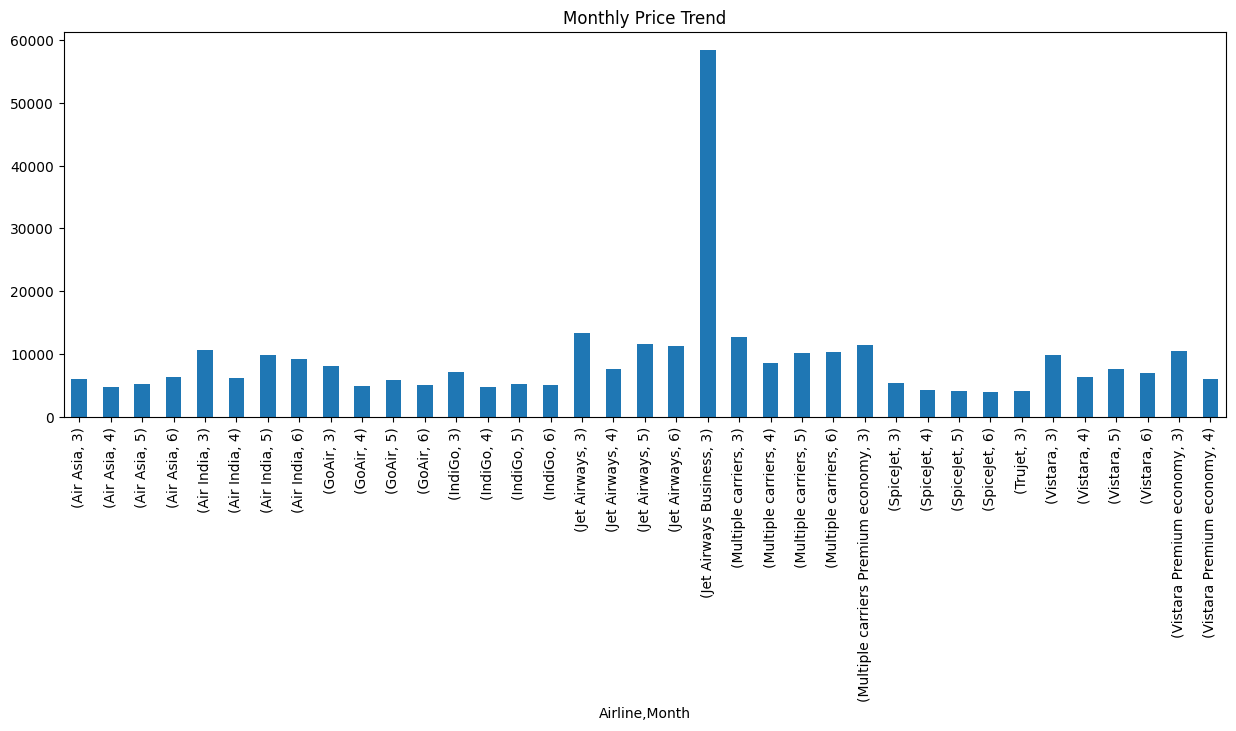

In [97]:
x.plot(kind='bar', title='Monthly Price Trend', figsize=(15, 5))

## 3.7 Average Departure Hour by Airline

In [98]:
df.groupby('Airline')['Dep_hour'].mean()

,Dep_hour
Airline,
Air Asia,13.996865
Air India,12.321714
GoAir,11.798969
IndiGo,12.215295
Jet Airways,13.363731
Jet Airways Business,10.666667
Multiple carriers,10.062709
Multiple carriers Premium economy,7.769231
SpiceJet,12.282396


<Axes: title={'center': 'Average Departure Hour by Airline'}, xlabel='Airline'>

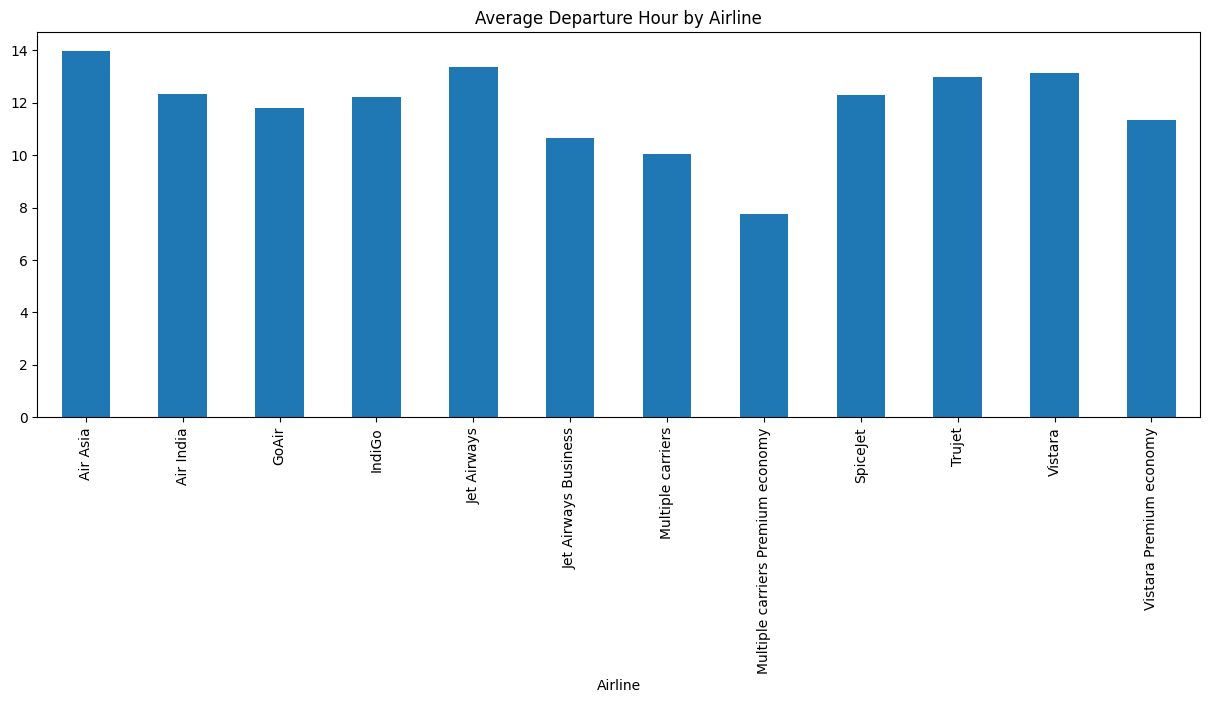

In [99]:
df.groupby('Airline')['Dep_hour'].mean().plot(kind='bar', title='Average Departure Hour by Airline', figsize=(15, 5))

# Downloading CLeaned dataset


In [100]:
# Assuming your cleaned DataFrame is called 'df_cleaned'
df.to_csv('cleaned_dataset.csv', index=False)
